In [3]:
%pip install protobuf==3.20.1

  Using cached protobuf-3.20.1-cp39-cp39-win_amd64.whl (904 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.0
    Uninstalling protobuf-5.29.0:
      Successfully uninstalled protobuf-5.29.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
grpcio-tools 1.68.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.1 which is incompatible.
grpcio-health-checking 1.68.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.1 which is incompatible.
googleapis-common-protos 1.63.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0.dev0,>=3.20.2, but you have protobuf 3.20.1 which is incompatible.


In [1]:
from sentence_transformers import SentenceTransformer
from PIL import Image
import requests
from pathlib import Path
from IPython.display import Image as IPImage, display

c:\Users\bipsr\anaconda3\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
c:\Users\bipsr\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
################ Function to display the retrieved images from the response to query , res-------> response after querying ###################
def show_images(res, src_img=None):
    for i in range(0,len(res["data"]["Get"]["Modality"])):
        f = res["data"]["Get"]["Modality"][i]['file_path']
        # Path to the image file
        image_path = str(f) # Replace with the correct path
        print(image_path)
        # Display the image
        display(IPImage(filename=image_path))

In [3]:
####### Loading the Vision Transformer Model for Image Embeddings ############
img_model = SentenceTransformer('clip-ViT-B-32')

c:\Users\bipsr\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
####### Loading the Text Transformer Model for text Embeddings ############
text_model = SentenceTransformer('clip-ViT-B-32-multilingual-v1')

In [5]:
######## Helper Function to load the image #########
def load_image(path):
    return Image.open(path)

In [6]:
import base64

def to_base64(path):
    with open(path, 'rb') as file:
        return base64.b64encode(file.read()).decode('utf-8')

In [7]:
################## Update the folder with the Images here ########################

product_img_dir = Path(r"C:\Users\bipsr\Desktop\Capstone\archive (1)\IMGS")
product_img_paths = [str(p) for p in product_img_dir.glob("*.jpg")]

In [8]:
product_img_paths

['C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1163.jpg',
 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1164.jpg',
 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1165.jpg',
 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1525.jpg',
 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1526.jpg',
 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1528.jpg',
 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1529.jpg',
 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1530.jpg',
 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1531.jpg',
 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1532.jpg',
 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1533.jpg',
 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1534.jpg',
 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1535.jpg',
 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1536.jpg',
 'C:\\Users\\bipsr\\Desktop\\Capst

In [8]:
from dotenv import load_dotenv

load_dotenv() 

True

In [12]:
%pip install --upgrade weaviate-client

  Using cached weaviate_client-4.9.4-py3-none-any.whl (386 kB)
  Using cached protobuf-5.29.0-cp39-cp39-win_amd64.whl (434 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\bipsr\\anaconda3\\Lib\\site-packages\\google\\~-2tobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [10]:
import weaviate
import weaviate.classes as wvc
from weaviate.util import generate_uuid5
import os

In [11]:
url=os.getenv("WEAVIATE_URL")
url

'https://kludkfsathm6dty1u5rcq.c0.us-east1.gcp.weaviate.cloud'

In [12]:
######## Creating client to connect to weaviate instance on cloud ################
client = weaviate.Client(
    url=os.getenv("WEAVIATE_URL"),
    auth_client_secret=weaviate.auth.AuthApiKey(api_key=os.getenv("WEAVIATE_API_KEY")),
)

C:\Users\bipsr\AppData\Local\Temp\ipykernel_8484\782364059.py:2: DeprecationWarning: 
Python client v3 `weaviate.Client(...)` connections and methods are deprecated and will
            be removed by 2024-11-30.

            Upgrade your code to use Python client v4 `weaviate.WeaviateClient` connections and methods.
                - For Python Client v4 usage, see: https://weaviate.io/developers/weaviate/client-libraries/python
                - For code migration, see: https://weaviate.io/developers/weaviate/client-libraries/python/v3_v4_migration

            If you have to use v3 code, install the v3 client and pin the v3 dependency in your requirements file: `weaviate-client>=3.26.7;<4.0.0`
  client = weaviate.Client(
c:\Users\bipsr\anaconda3\lib\site-packages\weaviate\warnings.py:186: DeprecationWarning: Dep016: Python client v3 `weaviate.Client(...)` connections and methods are deprecated and will
            be removed by 2024-11-30.

            Upgrade your code to use Python

In [13]:
print(client.is_ready())

True


In [43]:
###################### CREATING A SCHEMA OF THE CLASS FOR UPSERTING THE PROPERTIES TO WEAVIATE ########################

class_obj = {
    "class": "mmultimodality",
    "vectorizer": "text2vec-openai",  # set your vectorizer module
    "moduleConfig": {
        "generative-openai": {
            "model": "gpt-4"
        }
    },
    "properties": [
        {"name": "file_path",
            "dataType": ["text"]
            },
        {"name": "img_source",
            "dataType": ["text"]
            },
        {"name": "image",
            "dataType": ["blob"]
            },
        {"name": "image_hash",
            "dataType": ["text"]
            },
    ]
}



In [44]:
client.schema.create_class(class_obj)

In [14]:
import hashlib
def get_image_hash(image_path):
    """
    Generate a hash for the image to check for duplicates.
    """
    # Open the image and generate a hash based on the image content
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

In [ ]:
################# Adding the objects to the class #########################
class_name = "mmultimodality"
client.batch.configure(batch_size=100)  # Configure batch
with client.batch as batch:
    for img_set in [
        (product_img_paths, "TMDB"),
    ]:
        for img_path in img_set[0][:100]:
            vector = img_model.encode([load_image(img_path)])[0].tolist()
            img_b64 = to_base64(img_path)
            image_hash = get_image_hash(img_path)
            
            properties={
                "file_path":img_path,
                "image":img_b64,
                "img_source": img_set[1],
                "image_hash": image_hash
            }

            batch.add_data_object(
            properties,
            class_name,
            vector=vector,
            uuid=generate_uuid5(img_path)  # Optional: Specify an object vector  
        )

In [15]:
response = client.schema.get("mmultimodality")

In [16]:
response

{'class': 'Mmultimodality',
 'invertedIndexConfig': {'bm25': {'b': 0.75, 'k1': 1.2},
  'cleanupIntervalSeconds': 60,
  'stopwords': {'additions': None, 'preset': 'en', 'removals': None}},
 'moduleConfig': {'generative-openai': {'model': 'gpt-4'},
  'text2vec-openai': {'baseURL': 'https://api.openai.com',
   'model': 'text-embedding-3-small',
   'vectorizeClassName': True}},
 'multiTenancyConfig': {'autoTenantActivation': False,
  'autoTenantCreation': False,
  'enabled': False},
 'properties': [{'dataType': ['text'],
   'indexFilterable': True,
   'indexRangeFilters': False,
   'indexSearchable': True,
   'moduleConfig': {'text2vec-openai': {'skip': False,
     'vectorizePropertyName': False}},
   'name': 'file_path',
   'tokenization': 'word'},
  {'dataType': ['text'],
   'indexFilterable': True,
   'indexRangeFilters': False,
   'indexSearchable': True,
   'moduleConfig': {'text2vec-openai': {'skip': False,
     'vectorizePropertyName': False}},
   'name': 'img_source',
   'tokenizat

{'data': {'Get': {'Mmultimodality': [{'file_path': 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\1624.jpg', 'image': '/9j/4AAQSkZJRgABAQEASABIAAD/7RF2UGhvdG9zaG9wIDMuMAA4QklNBCUAAAAAABAAAAAAAAAAAAAAAAAAAAAAOEJJTQPtAAAAAAAQAEgAAAABAAEASAAAAAEAAThCSU0EJgAAAAAADgAAAAAAAAAAAAA/gAAAOEJJTQQNAAAAAAAEAAAAHjhCSU0EGQAAAAAABAAAAB44QklNA/MAAAAAAAkAAAAAAAAAAAEAOEJJTScQAAAAAAAKAAEAAAAAAAAAAjhCSU0D9QAAAAAASAAvZmYAAQBsZmYABgAAAAAAAQAvZmYAAQChmZoABgAAAAAAAQAyAAAAAQBaAAAABgAAAAAAAQA1AAAAAQAtAAAABgAAAAAAAThCSU0D+AAAAAAAcAAA/////////////////////////////wPoAAAAAP////////////////////////////8D6AAAAAD/////////////////////////////A+gAAAAA/////////////////////////////wPoAAA4QklNBAgAAAAAABAAAAABAAACQAAAAkAAAAAAOEJJTQQeAAAAAAAEAAAAADhCSU0EGgAAAAADNwAAAAYAAAAAAAAAAAAABaAAAAQ4AAAAAQAxAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAQ4AAAFoAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAABAAAAABAAAAAAAAbnVsbAAAAAIAAAAGYm91bmRzT2JqYwAAAAEAAAAAAABSY3QxAAAABAAAAABUb3AgbG9uZwAAAAAAAAAATGVmdGxvbmcAAAAAAAAAAEJ0b21

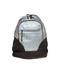

C:\Users\bipsr\Desktop\Capstone\archive (1)\IMGS\1526.jpg


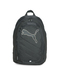

C:\Users\bipsr\Desktop\Capstone\archive (1)\IMGS\1565.jpg


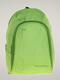

C:\Users\bipsr\Desktop\Capstone\archive (1)\IMGS\1598.jpg


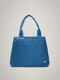

C:\Users\bipsr\Desktop\Capstone\archive (1)\IMGS\1559.jpg


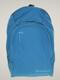

In [17]:
##################################### QUERYING WITH TEXT ###############################################

query = "SCHOOL BAG"
text_vec = text_model.encode([query])[0].tolist()

def query_near_vector():
    try:
        # Construct the query
        result = client.query.get("Mmultimodality", ["image", "file_path"]) \
            .with_near_vector({"vector": text_vec}) \
            .with_where({
                "path": ["img_source"], 
                "operator": "Equal", 
                "valueString": "TMDB"
            }) \
            .with_limit(5) \
            .do()

        # Check if there are results
        if "data" in result and "Get" in result["data"] and "Mmultimodality" in result["data"]["Get"]:
            for obj in result["data"]["Get"]["Mmultimodality"]:
                image = obj.get("image", "No image")
                file_path = obj.get("file_path", "No file path")
                print(result)
                print(f"Image: {image}, File Path: {file_path}")

            for i in range(0,len(result["data"]["Get"]["Mmultimodality"])):
                    f = result["data"]["Get"]["Mmultimodality"][i]['file_path']
                    # Path to the image file
                    image_path = str(f) # Replace with the correct path
                    print(image_path)
                    # Display the image
                    display(IPImage(filename=image_path))
                
        else:
            print("No results found.")

    except Exception as e:
        print(f"An error occurred: {e}")

# Call the function to query near vectors
query_near_vector()

In [ ]:
#res = {'data': {'Get': {'Modality': [{'file_path': 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\Image\\1555.jpg', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/7QCCUGhvdG9zaG9wIDMuMAA4QklNBAQAAAAAAEocAVoAAxslRxwCAAACAAIcAnQANiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIDhCSU0EJQAAAAAAEIM8Ii4efejgzr16h+Qb3Iz/7AARRHVja3kAAQAEAAAAPAAA/+EAXEV4aWYAAElJKgAIAAAAAQCYggIANwAAABoAAAAAAAAAICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgAAAAAP/hBjxodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0i77u/IiBpZD0iVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkIj8+IDx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IkFkb2JlIFhNUCBDb3JlIDUuMC1jMDYwIDYxLjEzNDc3NywgMjAxMC8wMi8xMi0xNzozMjowMCAgICAgICAgIj4gPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4gPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIgeG1sbnM6eG1wUmlnaHRzPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvcmlnaHRzLyIgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIiB4bWxuczpJcHRjNHhtcENvcmU9Imh0dHA6Ly9pcHRjLm9yZy9zdGQvSXB0YzR4bXBDb3JlLzEuMC94bWxucy8iIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCBDUzUgV2luZG93cyIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDoxRDlDQkRBRDVDMjcxMUUwODJEOUY0RjhCODczMDJEOCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDoxRDlDQkRBRTVDMjcxMUUwODJEOUY0RjhCODczMDJEOCI+IDx4bXBSaWdodHM6VXNhZ2VUZXJtcz4gPHJkZjpBbHQ+IDxyZGY6bGkgeG1sOmxhbmc9IngtZGVmYXVsdCIvPiA8L3JkZjpBbHQ+IDwveG1wUmlnaHRzOlVzYWdlVGVybXM+IDxkYzpyaWdodHM+IDxyZGY6QWx0PiA8cmRmOmxpIHhtbDpsYW5nPSJ4LWRlZmF1bHQiPiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIDwvcmRmOmxpPiA8L3JkZjpBbHQ+IDwvZGM6cmlnaHRzPiA8ZGM6Y3JlYXRvcj4gPHJkZjpTZXE+IDxyZGY6bGk+ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgPC9yZGY6bGk+IDwvcmRmOlNlcT4gPC9kYzpjcmVhdG9yPiA8ZGM6dGl0bGU+IDxyZGY6QWx0Lz4gPC9kYzp0aXRsZT4gPElwdGM0eG1wQ29yZTpDcmVhdG9yQ29udGFjdEluZm8gSXB0YzR4bXBDb3JlOkNpQWRyRXh0YWRyPSIiIElwdGM0eG1wQ29yZTpDaUFkckNpdHk9IiIgSXB0YzR4bXBDb3JlOkNpQWRyUmVnaW9uPSIiIElwdGM0eG1wQ29yZTpDaUFkclBjb2RlPSIiIElwdGM0eG1wQ29yZTpDaUFkckN0cnk9IiIgSXB0YzR4bXBDb3JlOkNpVGVsV29yaz0iIiBJcHRjNHhtcENvcmU6Q2lFbWFpbFdvcms9IiIgSXB0YzR4bXBDb3JlOkNpVXJsV29yaz0iIi8+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjFEOUNCREFCNUMyNzExRTA4MkQ5RjRGOEI4NzMwMkQ4IiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjFEOUNCREFDNUMyNzExRTA4MkQ5RjRGOEI4NzMwMkQ4Ii8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/9sAQwAEAwMEAwMEBAQEBQUEBQcLBwcGBgcOCgoICxAOEREQDhAPEhQaFhITGBMPEBYfFxgbGx0dHREWICIfHCIaHB0c/9sAQwEFBQUHBgcNBwcNHBIQEhwcHBwcHBwcHBwcHBwcHBwcHBwcHBwcHBwcHBwcHBwcHBwcHBwcHBwcHBwcHBwcHBwc/8AAEQgAUAA8AwERAAIRAQMRAf/EABsAAAIDAQEBAAAAAAAAAAAAAAQFAwcIBgEC/8QANxAAAQMCBAQDBQUJAAAAAAAAAQACAwQRBQYhMQcSIkETUWElcYGxshQyQmORFSNEUnKCoaLR/8QAHAEBAAEFAQEAAAAAAAAAAAAAAAECAwUGBwQI/8QAMBEAAgECAwUGBQUAAAAAAAAAAAECAwQRITEFBhJBcTJhcoGxwRMUM1GhImKR0fD/2gAMAwEAAhEDEQA/ANDRsurRWGwwqAGxU5I0aT8EBN4FuxQEb4NDogAZoN0AvlisTogB+WykDaCK6gEtU6SCKJkNhNPK2FjnC4be5Lrd7AE287Igc3xRzDT5ByJiuYHUZrqilY1sTJZD1SOPK0uIOwJubeSqjm8Cl5Iyfh/HvMtXJ4tTi8tI8W5WwiRzCdfwh4AGn+VeUUW8WXJwT494tnvMjcv4zSUznTRPfFUwDkcC0XIc3Y3HcK3OKSxRVCT0ZfksV7q2XBdPFugASzUqQOKdigBNRRfa4ORrzHIxzZI5AL8jwbg27+RHcEoCueOErZeG+KUGL0LXR1YbHG+nqAeaUG7eVruV24ud7Dz70TqqkuJs9uz7KpeVlThHH78sjIeG5MAiJdRkuIt1Sk/Jq8D2hNPKX4RutLdS2lHGVN4+J+yLM4DYXR5a4iwVdc1tPE6J8cUjnFwEjhYDW1gddVcpXym+GbMbtPdl0aTqW8NO9t4eaNfSM3XuNPF1QzdAL3M1KAaU40QDGIaIDPXFDGTmTNs1LzXosNJhjb2LvxO/X5LX76u51Glosjr+6my421lGpJfqnm/ZeSEdNh8fJYNA+C8KRskqmGgLWUTWgkABw2U6ErCawZe/DPMMmYMsMFQ8vqqJ3gSOO7ha7Sfhp8FsNjWdSlnqjj+9Gzo2V63BYRnmuvP85+Z0s7d17DWxc5vUUAwpkAyh3b70Blyhhjr8ZxF1RVNgJle/nfsTzG//AHzPZatwqc3xPA7zTnKjaw+HHiySy6f7uXMfU+ECzb4hQhpvciW5bb0sqlR/cixO71wpy/gAxPDTT075XVNJJYgckcoc43728lROnwrHFHptrhTnwqLXVYHY8EZD4+OxX6eWJ1vW7gsnst9pdDR9+4rCjLvfsWpPpdZc54L3/eKAMpjogGUJ1HvCDkZSI5cSrR5TP+orUqnaZ9A2mdvHovQYMPSoD1B6g6FQy7TO94Iu9oY2PyYz/sVl9l6yNA37+nR6v0LZnO6zBzgXv+8UAVTFAMoDdzfeEQehlWocG4viAv8AxEn1FanV7bPoCwztodF6BbH9KpRdccyCod0nVQy5BHecEXe1caH5DPrWX2X2pdDn2/X0qXifoW3O611mDm4ve7qKAIp3oBnTv6m+8IiHozK1cSMcxMWF/tEun9xWqVe2+p9AbNa+Wp+FeiJI5OgK2j1tEE8p5NW2Hb1QqWR3nBB/tnGfWmb9ay+zO1Loc835+hS8T9C3537rMHNhe52pQE0L7IBjDJbYoCgeJeUK7AMYq8Tp6eSbC6uQyiSNpd4TjqWuttrex2WCu7SUZucVkzq+7W8FGtbxt6ssJxWGfPDRr3K//b0YBHiMv/UF4vhs2v5hcjyHEJMQmbBSsfUTONhHC0vcfgFVGi5ZJFirfU6UXKckl3l+cLco1OWsNqK3EWGKurQ39yd4mDUA+pOtu1gs1ZW7pRblqzlu8+2YbQqxp0c4R5/d/wBHZTSbr3I1YDLrkqQfccllAC4Zrd0AbFPYboAabCsLqnc8+G0Mr/5n0zHH9SFS4p8i9GvVisIza82SQQ01E0tpqeGBvlDG1nyClJLQtynKfaePUill31UlIBI+90BGpB//2Q=='}, {'file_path': 'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\Image\\1559.jpg', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD//gA+Q1JFQVRPUjogZ2QtanBlZyB2MS4wICh1c2luZyBJSkcgSlBFRyB2NjIpLCBkZWZhdWx0IHF1YWxpdHkK/9sAQwAIBgYHBgUIBwcHCQkICgwUDQwLCwwZEhMPFB0aHx4dGhwcICQuJyAiLCMcHCg3KSwwMTQ0NB8nOT04MjwuMzQy/9sAQwEJCQkMCwwYDQ0YMiEcITIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIy/8AAEQgAUAA8AwEiAAIRAQMRAf/EABsAAAIDAQEBAAAAAAAAAAAAAAIHAwQFBgEA/8QANRAAAQMCBQEFBQcFAAAAAAAAAQACAwQRBQYSITFBUWFxkaETFDKBwSIjQlKx0eFiY3KSov/EABkBAQADAQEAAAAAAAAAAAAAAAUAAQIEA//EACQRAAICAgEDBAMAAAAAAAAAAAABAgQDETESInEUITNBMlFS/9oADAMBAAIRAxEAPwBlhiIMUoasDM2ZosBibDEwS1souxp+Fg/M76Dqsxi5vSJKSits15pYKWIy1EscUY/E9wA9Vz+KZywygiY6la/EZC/SWU5A0jqSXbJf1uIVNfMamuqHzP6X4HcB0UTA6TcjS31KRhQWu5h87z32obOF4xR4rTMljeInvuPYyuaHj5XWlo7klzsLjotXAczYhhNU1j5JKmiO7onG5A7W9h7ljLRcVuD2bxXVJ6mtDR0IdCmhkiqII54Xh8UjQ5jhwQeEWlcB3h2AFybAblJzH66TE8TqKnY/b+wO4bD0TZxiX3fBK6YctgeR42skyxriOd7bk9AkKMeZB96XESNsYa8a7veBc93gidK65AhkIH5QP3UsUIsdAs3tO5UojPV7kjphu0VRUBo+9Y6Mdjh+y8bpF3sOqMnYg/orD4tuVXAERcdAsdzba/8AKnv9lpoZuRKh0uBvgc/WIJSGH+l29vO66eyXWQp3wY0+AO1Q1EZv3Ebi/qEyLIW1DpysZqz6sSM/Hw05exEP+H3d/wCiTTHH2f8AkbJuZskMeVcQI6sDfNwCUcTbxMd0uV2UF2vycd99y8F5kr2Q6WvIbci3TgIVGCQO691IOEiHHjuFWeNjbkcK1bZQObuR81C0buRnhuZooxwWuI8NN01EqMnXjzZR2/EHD/lya6GurWReBil8b8mPmWL3jLGIs/slw8Rv9EpYgDEA3i+ycdfCKrDaqnPEsL2eYKTFO5zWMY4WNuzZe1B8o8b690y0ByDwjaEAPbwjSYYfcIHN6/JSchCRsQpsho5blEGYsOk6mXR5iya90osCjfJmOhYzciZpA7ANyfRNrUiL3yIXofg/JXDgRY8HlKjEqJ9HiU1O4fBI4A93T6Joh657GsBnxPEmzxOiYzQGuLib38F51cihPu4N28TnBdPJw4G6MLqm5Nk61UX+pXoyhK07TxO8wkPV4v2HekzfycyyF72ktbe3KL3aWxuwrp2ZTk4dNCB3AlTNyo3rUs+Ud/qqdvEvstVMz+jGyrAW5lhc4C7I3n0/lMPWufwzAm4ZXvqGyh7SwtaCLEXWxrR1nIsk9xEquOWPHqXJ/9k='}]}}}

In [ ]:
#res["data"]["Get"]["Modality"][0]['file_path']

'C:\\Users\\bipsr\\Desktop\\Capstone\\archive (1)\\IMGS\\Image\\1555.jpg'

Image: /9j/4AAQSkZJRgABAQAAAQABAAD//gA+Q1JFQVRPUjogZ2QtanBlZyB2MS4wICh1c2luZyBJSkcgSlBFRyB2NjIpLCBkZWZhdWx0IHF1YWxpdHkK/9sAQwAIBgYHBgUIBwcHCQkICgwUDQwLCwwZEhMPFB0aHx4dGhwcICQuJyAiLCMcHCg3KSwwMTQ0NB8nOT04MjwuMzQy/9sAQwEJCQkMCwwYDQ0YMiEcITIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIy/8AAEQgAUAA8AwEiAAIRAQMRAf/EABsAAAICAwEAAAAAAAAAAAAAAAQGAgMBBQcA/8QANBAAAQMCBAMGAwgDAAAAAAAAAQACAwQRBRIhMRNBYQYiUXGRoVKB8BQVMjNywdHhQrHx/8QAGQEAAgMBAAAAAAAAAAAAAAAAAwQAAgUB/8QAJxEAAgICAQIEBwAAAAAAAAAAAAECAwQREiExExRBgSIyUWFxkfD/2gAMAwEAAhEDEQA/AOmBiyGK4NQ9dWQ4fTmaY9GtG7j9c0NtJbZ3sTyKiKro56uakhq4JKmH82FsgL2ebdwlqXHsQrO9GTBCdhHofXdBMhHFdNlaJDu+3ePz3SssuK7LYF3r0Hvh9FjIkxk9TA4PiqHsd+o2KY8Gxb7wBhmaG1DRe42cP2KtXkxm9di0LVJ6DyxQyIotUMiZClwak7FKg1la+V2sbSY4m8soNifmbn0TlI4RRPkOzQSkOunbAyR52YPoJPLlpKK9QVr6aAKqrZSBrZZGsbazGNF3HoBzWIK2Ywta3D6tx5khrb+pU8NpbMFXMzPPNYk8wDsB0st/AxpjvlLSeR3We2kKGidXSC5lw+qa3oA63oUXg1bC6UzU0gLw7UHQjzC2paOY0WlxWkNPkxGm7ksZu7qOYPRRM6ujH9jhJG142cLr1kFgtQKrD2yDYgEDw0WwstiuXKCkP

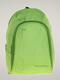

C:\Users\bipsr\Desktop\Capstone\archive (1)\IMGS\1559.jpg


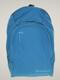

C:\Users\bipsr\Desktop\Capstone\archive (1)\IMGS\1556.jpg


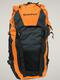

C:\Users\bipsr\Desktop\Capstone\archive (1)\IMGS\1557.jpg


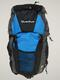

C:\Users\bipsr\Desktop\Capstone\archive (1)\IMGS\1599.jpg


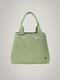

In [18]:
###################### QUERYING WITH IMAGE #########################

from IPython.display import Image as IPImage, display
query = load_image(r'C:\Users\bipsr\Desktop\Capstone\archive (1)\IMGS\1565.jpg')
img_vec = img_model.encode([query])[0].tolist()
#print(img_vec)


def query_near_vector():
    try:
        # Construct the query
        result = client.query.get("Multimodality", ["image", "file_path"]) \
            .with_near_vector({"vector": img_vec}) \
            .with_where({
                "path": ["img_source"], 
                "operator": "Equal", 
                "valueString": "TMDB"
            }) \
            .with_limit(5) \
            .do()
        # Check if there are results
        if "data" in result and "Get" in result["data"] and "Multimodality" in result["data"]["Get"]:
            for obj in result["data"]["Get"]["Multimodality"]:
                image = obj.get("image", "No image")
                file_path = obj.get("file_path", "No file path")
                print(f"Image: {image}, File Path: {file_path}")
            
            for i in range(0,len(result["data"]["Get"]["Multimodality"])):
                    f = result["data"]["Get"]["Multimodality"][i]['file_path']
                    # Path to the image file
                    image_path = str(f) # Replace with the correct path
                    print(image_path)
                    # Display the image
                    display(IPImage(filename=image_path))
        else:
            print("No results found.")

    except Exception as e:
        print(f"An error occurred: {e}")

# Call the function to query near vectors
query_near_vector()


In [19]:

############## FOR REAL TIME INDEX UPDATES ###################
#image_path = r"C:\Users\bipsr\Desktop\Capstone\archive (1)\Actual dataset\55197.jpg"
image_path = r"C:\Users\bipsr\Downloads\download (1).jpeg"
classname="mmultimodality"

def get_image_hash(image_path):
    """
    Generate a hash for the image to check for duplicates.
    """
    # Open the image and generate a hash based on the image content
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

def check_image_exists(image_hash):
    """
    Check if the image already exists in the Weaviate database using the image hash.
    """
    result = client.query.get("Mmultimodality", ["file_path"]).with_where({
        "path": ["file_path"],
        "operator": "Equal",
        "valueString": image_hash
    }).do()
    print(result)
    print(len(result["data"]["Get"]["Mmultimodality"]))
    if len(result["data"]["Get"]["Mmultimodality"]) > 0:
        return 1
    else:
        return 0

def ingest_image(image_path):
    """
    Function to ingest image embeddings into Weaviate only if the image doesn't already exist.
    """
    # Generate a unique hash for the image
    image_hash = get_image_hash(image_path)
    print(image_hash)
    
    # Check if the image already exists in the database
    if check_image_exists(image_hash) == 1:
        print(f"Image {image_path} already exists in the database. Skipping ingestion.")
        return
    
    # Get the image embedding
    embedding = img_model.encode([load_image(image_path)])[0].tolist()
    img_b64 = to_base64(image_path)
    
    # Create the data to store in Weaviate
    properties={
                "file_path":image_path,
                "image":img_b64,
                "img_source": image_path
            }
    
    # Ingest the image embedding into Weaviate
    client.batch.add_data_object(
            properties,
            classname,
            vector=embedding,
            uuid=generate_uuid5(image_path)  # Optional: Specify an object vector
        )
    print(f"Image {image_path} ingested successfully.")

  # Replace with your image file path
ingest_image(image_path)

fde43039d606743fc5003d913552ac4e
{'data': {'Get': {'Mmultimodality': []}}}
0
Image C:\Users\bipsr\Downloads\download (1).jpeg ingested successfully.
